<a href="https://colab.research.google.com/github/acecode101/PRODIGY_ML_03/blob/main/TASK_3_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

with zipfile.ZipFile('training_set.zip', 'r') as zip_ref:
    zip_ref.extractall('training_set')

Saving training_set.zip to training_set.zip


In [ ]:
uploaded = files.upload()
with zipfile.ZipFile('test_set.zip', 'r') as zip_ref:
    zip_ref.extractall('test_set')

Saving test_set.zip to test_set.zip


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for loading and preprocessing images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [ ]:
import numpy as np

def flatten_data(generator):
    data = []
    labels = []
    for batch_data, batch_labels in generator:
        # Flatten each image in the batch and append to data list
        flattened_data = batch_data.reshape(batch_data.shape[0], -1)
        data.append(flattened_data)

        # Reshape labels to be a column vector
        labels.append(batch_labels.reshape(-1, 1))  # Ensure labels are (n_samples, 1)

        # Stop after one epoch
        if generator.batch_index == 0:
            break

    return np.vstack(data), np.vstack(labels)  # Use np.vstack for labels to ensure correct shape

# Flatten train and test data
X_train, y_train = flatten_data(train_generator)
X_test, y_test = flatten_data(test_generator)

print(X_train.shape, y_train.shape)

(8005, 12288) (8005, 1)


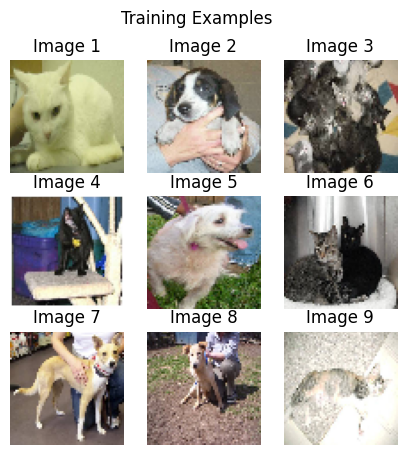

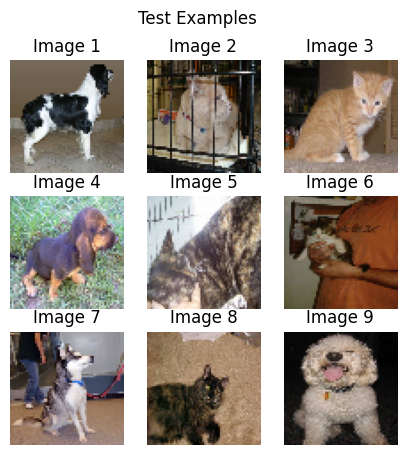

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize images
def visualize_images(generator, title, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Image {i + 1}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize training examples
visualize_images(train_generator, "Training Examples")

# Visualize test examples
visualize_images(test_generator, "Test Examples")

Accuracy: 87.00%

Classification Report:
 {'Class 0': {'precision': 0.8252427184466019, 'recall': 0.9139784946236559, 'f1-score': 0.8673469387755103, 'support': 93.0}, 'Class 1': {'precision': 0.9175257731958762, 'recall': 0.8317757009345794, 'f1-score': 0.872549019607843, 'support': 107.0}, 'accuracy': 0.87, 'macro avg': {'precision': 0.8713842458212391, 'recall': 0.8728770977791176, 'f1-score': 0.8699479791916767, 'support': 200.0}, 'weighted avg': {'precision': 0.8746141527374636, 'recall': 0.87, 'f1-score': 0.8701300520208082, 'support': 200.0}}
Accuracy: 0.87
Macro Average Precision: 0.87
Macro Average Recall: 0.87
Macro Average F1-score: 0.87
Weighted Average Precision: 0.87
Weighted Average Recall: 0.87
Weighted Average F1-score: 0.87


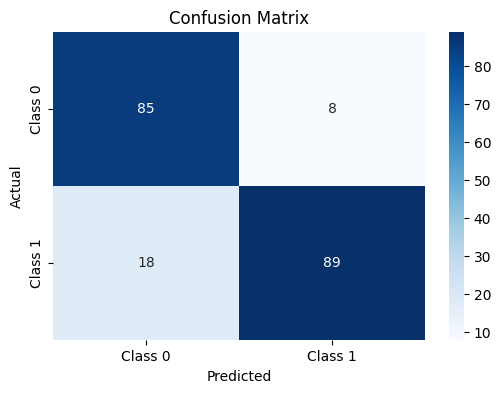

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test_scaled)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
print("\nClassification Report:\n", report)

# Display metrics: Accuracy, Macro Average, Weighted Average
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro Average Precision: {report['macro avg']['precision']:.2f}")
print(f"Macro Average Recall: {report['macro avg']['recall']:.2f}")
print(f"Macro Average F1-score: {report['macro avg']['f1-score']:.2f}")
print(f"Weighted Average Precision: {report['weighted avg']['precision']:.2f}")
print(f"Weighted Average Recall: {report['weighted avg']['recall']:.2f}")
print(f"Weighted Average F1-score: {report['weighted avg']['f1-score']:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

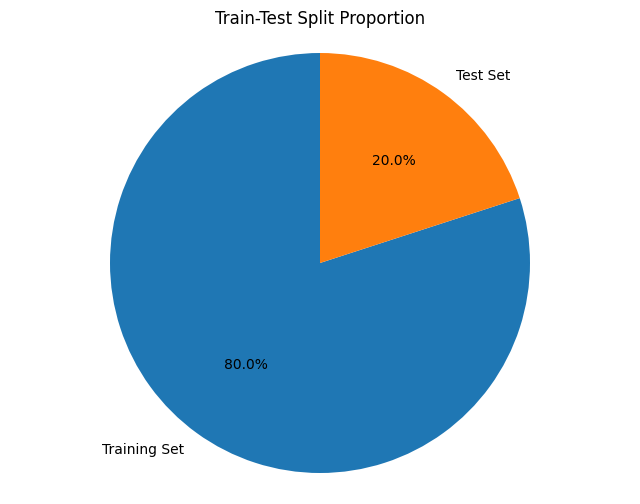

In [ ]:
labels = ['Training Set', 'Test Set']
sizes = [len(X_train), len(X_test)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Train-Test Split Proportion')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

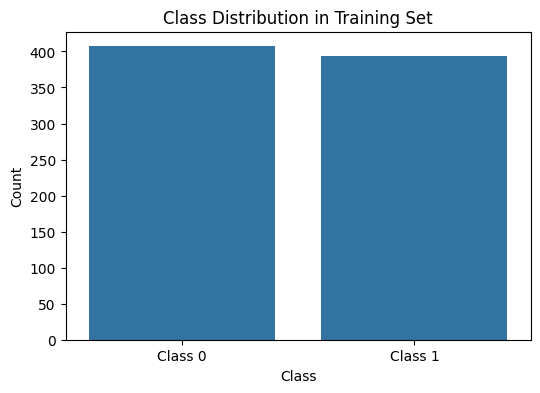

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

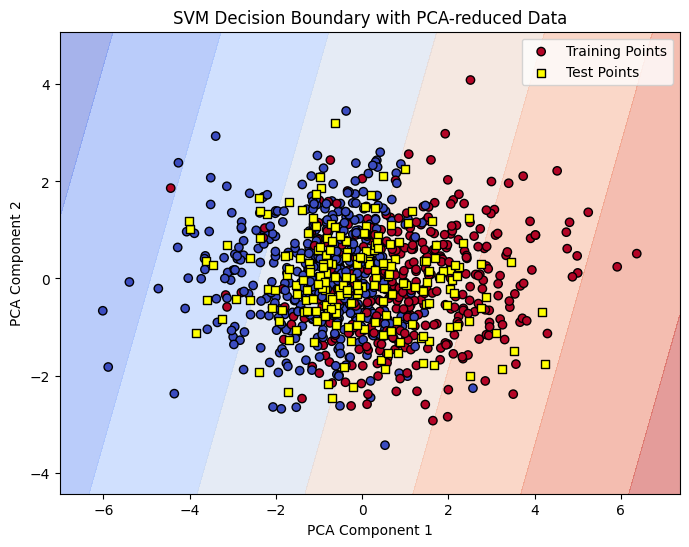

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM on PCA-reduced data
svm_classifier_pca = SVC(kernel='linear')
svm_classifier_pca.fit(X_train_pca, y_train)

# Create a meshgrid for decision function visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision function
Z = svm_classifier_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='coolwarm', marker='o', label='Training Points')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='yellow', edgecolors='k', marker='s', label='Test Points')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

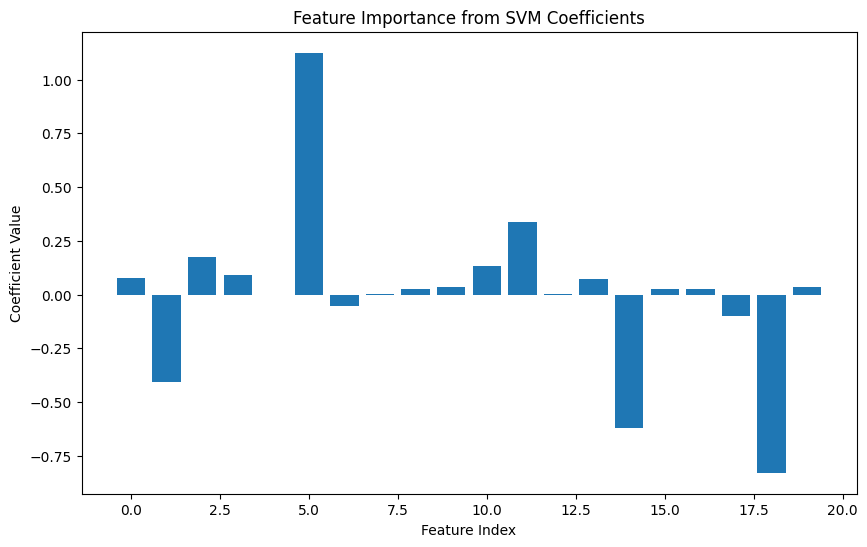

In [ ]:
# For a linear SVM, you can plot the coefficients to visualize feature importance
importance = svm_classifier.coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.title('Feature Importance from SVM Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

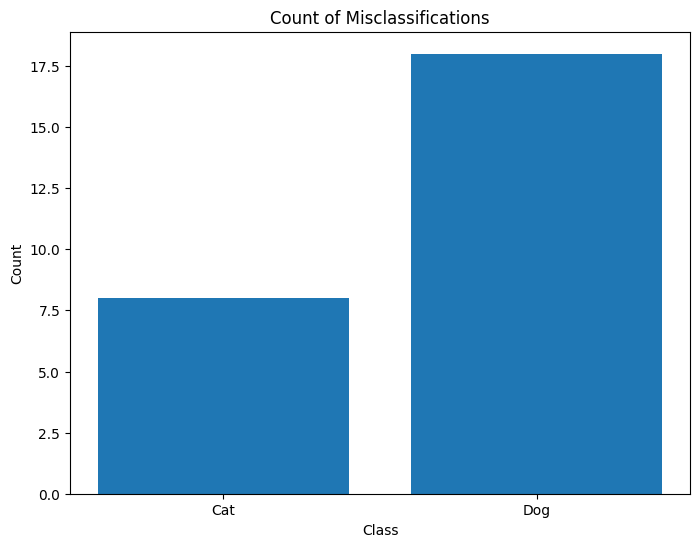

In [ ]:
from collections import Counter

# Calculate misclassifications
misclassified_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
misclassifications = y_test[misclassified_indices]

# Count misclassifications
counter = Counter(misclassifications)

plt.figure(figsize=(8, 6))
plt.bar(counter.keys(), counter.values())
plt.title('Count of Misclassifications')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.show()

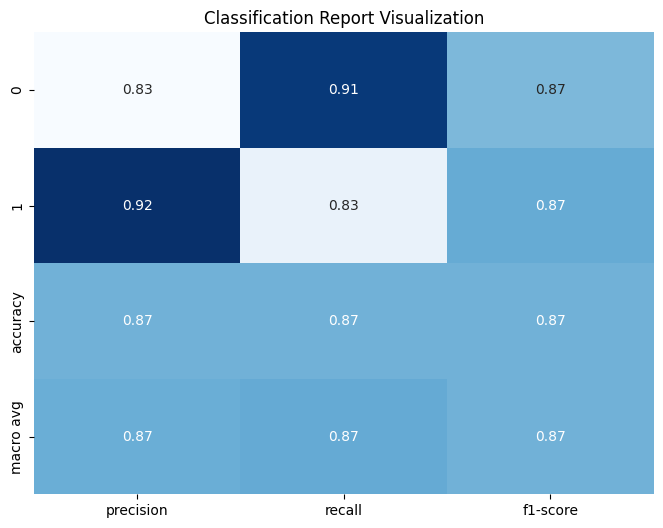

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", cbar=False)
plt.title('Classification Report Visualization')
plt.show()